In [306]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from neuralprophet import NeuralProphet
import seaborn as sns
import statsmodels.api as sm

# Importando os dados

In [307]:
df_demandas = pd.read_csv('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas')[['date','demandas']]
df_demandas.columns = ['ds','y']

# Fase de Testes

In [308]:
qtd_previsoes = 1
n_lags = 52
'''
indices_mudanca = [0,46,83,len(df_demandas)-1]
pontos_mudanca = [df_demandas.ds[i] for i in indices_mudanca]'''

'\nindices_mudanca = [0,46,83,len(df_demandas)-1]\npontos_mudanca = [df_demandas.ds[i] for i in indices_mudanca]'

In [309]:
params = { "growth": "off",
           #"trend_reg": 0.01,
           #"changepoints_range":0.3,
           "n_forecasts":qtd_previsoes,
           "n_changepoints": 0,
           "batch_size": 50,
           "n_lags": n_lags,
           "learning_rate": 0.1,
           "epochs": 100,
           #"changepoints": pontos_mudanca,
           "yearly_seasonality":3, #ao se colocar um numero, ele defini o grau da serie de fourier, por padrao e 6
           "weekly_seasonality":False,
           "daily_seasonality":False,
           "num_hidden_layers":1,
           #"d_hidden":2
        }

In [310]:
model = NeuralProphet(**params)

In [311]:
df_train, df_test = df_demandas.iloc[:166],df_demandas.iloc[166:]

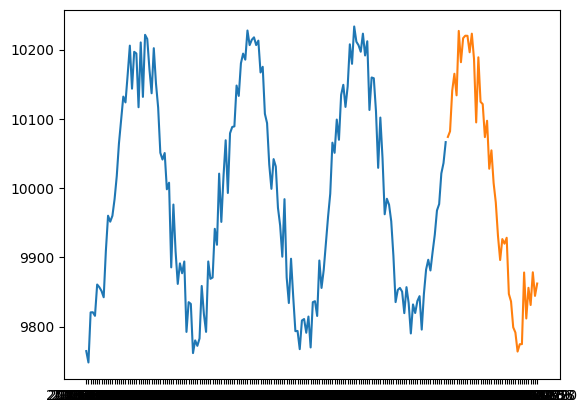

In [312]:
plt.plot(df_train.ds,df_train.y)
plt.plot(df_test.ds,df_test.y)

In [313]:
metrics = model.fit(df_train,freq='7d')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.398% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.


Training: 0it [00:00, ?it/s]

In [314]:
previsoes = model.predict(df_demandas)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 3it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


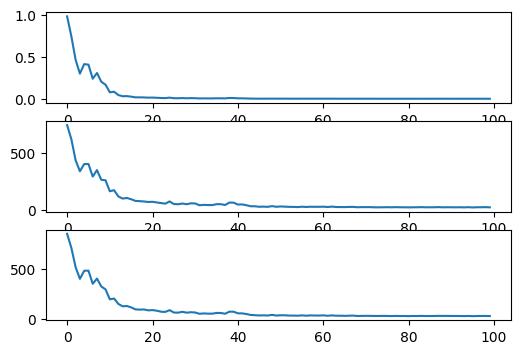

In [315]:
fig=plt.figure(figsize=(6,4))

ax=fig.add_subplot(3,1,1)
plt.plot(metrics.Loss)
ax=fig.add_subplot(3,1,2)
plt.plot(metrics.MAE)
ax=fig.add_subplot(3,1,3)
plt.plot(metrics.RMSE)

In [316]:
model.plot_parameters(components=['Trend','Seasonality'])

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': '2a227b56-438b-43d0-a027-ab89e85daed9',
              'x': array([datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2018, 3, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9904.275, 9904.275], dtype=float32),
              'yaxis': 'y'},
             {'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'yearly',
              'type': 'scatter',
              'uid': '10913830-e59f-4719-87a6-df847659edcb',
              'x': array([datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 2, 0, 0),
                          datetime.datetime(2017, 1, 3, 0, 0), ...,
                          datetime.

In [317]:
previsoes_test = previsoes['yhat1'].iloc[166:].values


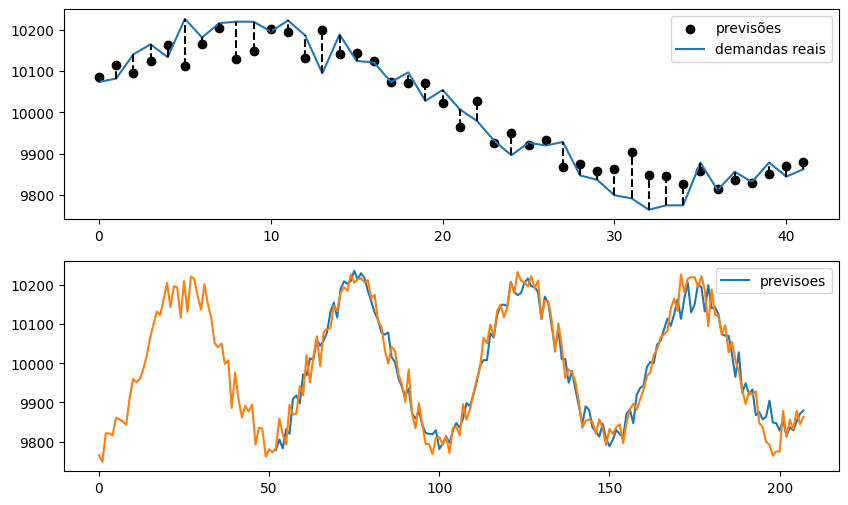

In [318]:
fig=plt.figure(figsize=(10,6))

ax=fig.add_subplot(2,1,1)


plt.scatter(range(len(df_test)),previsoes_test,label='previsões',color='black')
plt.plot(range(len(df_test)),df_test.y,label='demandas reais')
plt.legend()
indice = 0 
for i in range(len(previsoes_test)):
    if previsoes_test[i] > df_test.y.iloc[i]:
        plt.vlines(x=i, ymin=df_test.y.iloc[i], ymax=previsoes_test[i],linestyle='--',color='black')
    else:
        plt.vlines(x=i, ymin=previsoes_test[i], ymax=df_test.y.iloc[i],linestyle='--',color='black')
    indice+=1



ax=fig.add_subplot(2,1,2)
plt.plot(previsoes['yhat1'],label='previsoes')
plt.plot(df_demandas.y)
plt.legend()

In [319]:
residuos = np.array(df_demandas.iloc[n_lags:].y)-previsoes.yhat1.iloc[n_lags:]

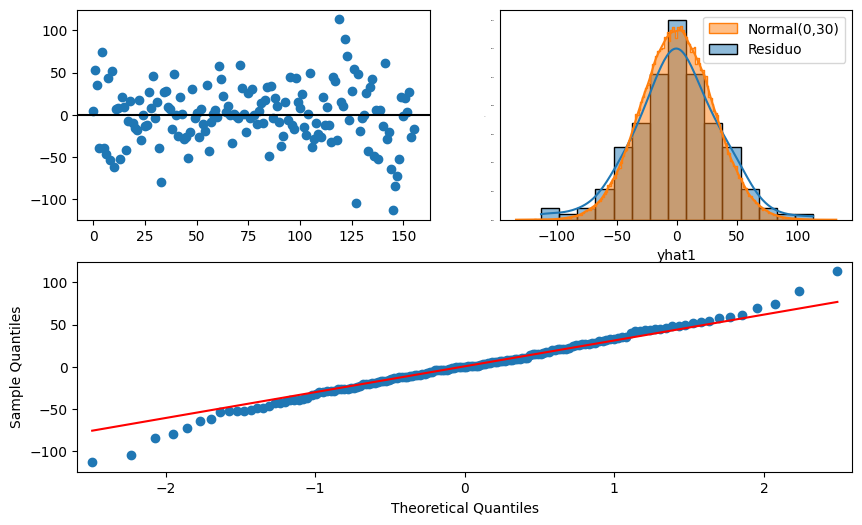

In [320]:
fig=plt.figure(figsize=(10,6))

ax=fig.add_subplot(2,2,1)

plt. axhline(y=0,xmin=0,xmax=len(df_demandas.y),color='black')
plt.scatter(range(len(residuos)),residuos)

ax=fig.add_subplot(2,2,2)
sns.histplot(residuos,kde=True,stat='density',label="Residuo")
sns.histplot(np.random.normal(0, 30,200000),kde=True,stat='density',element='step',label='Normal(0,30)')
plt.legend()
plt.tick_params(axis='y', labelsize=0, length=0)
plt.ylabel([], fontsize=0)

ax=fig.add_subplot(2,1,2)
sm.qqplot(residuos,line='q',ax=ax)
plt.show()

In [321]:
import statsmodels.api as sm

#print('MSE_Teste =',sm.tools.eval_measures.mse(previsoes_test, df_test.y, axis=0))

print('RMSE_Teste =',sm.tools.eval_measures.rmse(previsoes_test, df_test.y, axis=0))

print('MAE_Teste =',sm.tools.eval_measures.meanabs(previsoes_test, df_test.y, axis=0))

print(metrics.tail(1))

RMSE_Teste = 48.67010119620595
MAE_Teste = 38.2046086260001
          MAE      RMSE      Loss  RegLoss  epoch
99  21.993483  27.62985  0.001435      0.0     99


# Fase de previsao

A própria da documentação, avisa de antes de fazer qualquer previsão real, reajuste o modelo para receber todos os dados

In [322]:
model = NeuralProphet(**params)
metrics = model.fit(df_demandas,freq='7d')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.


Training: 0it [00:00, ?it/s]

In [323]:
future = model.make_future_dataframe(df_demandas, periods=qtd_previsoes, n_historic_predictions=True)
forecast = model.predict(future)
model.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.519% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 4it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '2ccf9903-b3c9-416e-b250-a46168b8c86c',
              'x': array([datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 8, 0, 0),
                          datetime.datetime(2015, 1, 15, 0, 0), ...,
                          datetime.datetime(2018, 12, 13, 0, 0),
                          datetime.datetime(2018, 12, 20, 0, 0),
                          datetime.datetime(2018, 12, 27, 0, 0)], dtype=object),
              'y': array([          nan,           nan,           nan, ..., 9860.94628906,
                          9912.45117188, 9928.38671875])},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
         

In [324]:
metrics.iloc[-1]

MAE        28.300642
RMSE       34.286625
Loss        0.002176
RegLoss     0.000000
epoch      99.000000
Name: 99, dtype: float64

In [325]:
model.plot_parameters()

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': '9ced891c-3607-4e3f-8735-35dd91d19149',
              'x': array([datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2018, 12, 20, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9229.5625, 9229.5625], dtype=float32),
              'yaxis': 'y'},
             {'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'yearly',
              'type': 'scatter',
              'uid': '3e1b0e0a-9063-4186-bf22-d327a3863799',
              'x': array([datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 2, 0, 0),
                          datetime.datetime(2017, 1, 3, 0, 0), ...,
                          datet